# Exploring Data from the Reference Image Mapper
**Where we start:**
This notebook is the start point of the data analysis pipeline described in our [blog post][blog_post_link].

We assume that you have downloaded a Reference Image Mapper Enrichment from Pupil Cloud, e.g. from our [Demo Workspace][workspace_link]. All files from that download are inside one single, unzipped folder and that folder is located in the same directory from where you run this code. If you also want to save figures, create an empty folder "figures" in the same directory.

**Dependencies:**
[matplotlib][matplotlib_link], [OpenCV][opencv_link], [pandas][pandas_link] and [numpy][numpy_link] are installed.

**What we do:**
We open and display the reference image, then plot fixations on top of it.

**What we get:**
A figure showing the reference image with fixation data from a single section. The size of the fixation markers is scaled by the duration of the fixation.

[workspace_link]: https://cloud.pupil-labs.com/workspace/78cddeee-772e-4e54-9963-1cc2f62825f9
[matplotlib_link]: https://matplotlib.org/ 
[opencv_link]: https://opencv.org/
[pandas_link]: https://pandas.pydata.org/
[numpy_link]:https://numpy.org/

## Import Needed Libraries and Define Paths

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# larger labels are nicer to read
plt.rcParams.update({'font.size': 18})

# ACTION NEEDED: define the path on your own PC
path_to_reference_image_mapper = "./Viewing_Paintings_REFERENCE-IMAGE-MAPPER_multiple_paintings_standing_csv"

## Load and Display the Reference Image
The core element of the Reference Image Mapper is - little surprise - the reference image. So let's have a look at it first.

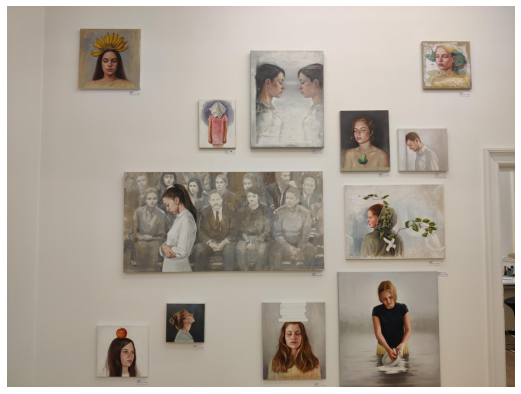

In [2]:
image_fig = plt.figure(figsize = (10,7))

reference_image = cv2.imread(f"{path_to_reference_image_mapper}/reference_image.jpeg")
# convert color format to RGB
reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)

plt.imshow(reference_image)

# remove numbers on axis
plt.gca().set_axis_off();

So this is the image relative to which we are going to get all our fixation locations. You can quickly check here if this was indeed the image you wanted to load (if it's not, you might still have the wrong folder defined in the first cell) or if anything else looks odd.

## Import the Fixation Data
The next important bit is the gaze data itself. In this example, we chose fixation data over individual gaze points, because besides telling us where observers looked, fixation data also contains the information how long they looked there.

The fixation data is stored as a csv table, and we use pandas to load the file as a dataframe.

In [3]:
fixations = pd.read_csv(f"{path_to_reference_image_mapper}/fixations.csv")
fixations.head()

,section id,recording id,fixation id,start timestamp [ns],end timestamp [ns],duration [ms],fixation detected in reference image,fixation x [px],fixation y [px]
0,3cd54e6f-f12e-468c-9a7b-6afffd5f0379,54a0deee-23dd-48f4-806e-6fdb519d6a7c,248,1636035560036503914,1636035560236515914,200,True,2419.0,2138.0
1,3cd54e6f-f12e-468c-9a7b-6afffd5f0379,54a0deee-23dd-48f4-806e-6fdb519d6a7c,249,1636035560256651914,1636035560480505914,223,True,2224.0,1717.0
2,3cd54e6f-f12e-468c-9a7b-6afffd5f0379,54a0deee-23dd-48f4-806e-6fdb519d6a7c,250,1636035560500491914,1636035560740669914,240,True,2427.0,1559.0
3,3cd54e6f-f12e-468c-9a7b-6afffd5f0379,54a0deee-23dd-48f4-806e-6fdb519d6a7c,251,1636035560776494914,1636035560972502914,196,True,1935.0,1119.0
4,3cd54e6f-f12e-468c-9a7b-6afffd5f0379,54a0deee-23dd-48f4-806e-6fdb519d6a7c,252,1636035561008557914,1636035561168510914,159,True,2828.0,1668.0


Now we can see which data the fixation file contains: besides the section and recording id, which are specific to individual observers and enrichment sections, we get:
- **fixation id**: an ID for each fixation, 
- **start timestamp [ns]**: the time when this fixation started  
- **end timestamp [ns]**: the time when this fixation ended
- **duration [ms]**: the duration of the fixation 
- **fixation detected in reference image**: if the fixation was inside the reference image
- **fixation x [px]**: x-coordinate of the fixation relative to the reference image 
- **fixation y [px]**: y coordinate of the fixation relative to the reference image


## Plot the Fixation Data on Top of the Reference Image
In the next step, we can visualise these information by overlaying the fixation position on the reference image. To show the duration of each fixation, we scale the size of each fixation marker by the duration of the fixation. 

To avoid cluttering the image with many different fixations, we chose to display only one observer. You can try and visualize different observers by changing the index at the selection of the example section in the first line of the cell below.

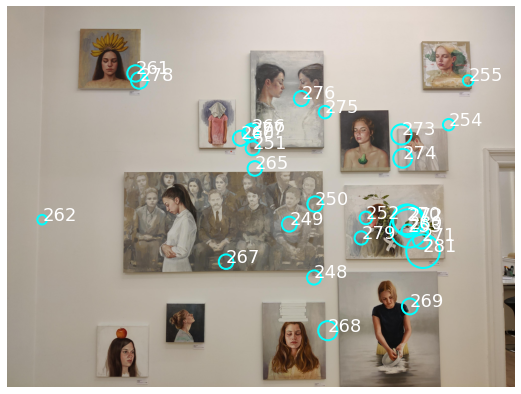

In [4]:
# select fixation data from a single observer
example_section = np.unique(fixations['section id'])[0]
example_fixations = fixations[fixations['section id'] == example_section]

fixation_fig = plt.figure(figsize = (10,7))
# show the reference image as above
plt.imshow(np.asarray(reference_image))
# plot fixations at their x- and y-position
plt.scatter(example_fixations['fixation x [px]'],
            example_fixations['fixation y [px]'],
            # change the face- and edgecolor to get circles rather than dots
            facecolor='none', edgecolor='cyan', linewidth=2, 
            # set the size of the circles relative to the duration of each fixation
            s = example_fixations['duration [ms]']);
# enumerate the fixations
for fix_id, x, y in zip(example_fixations['fixation id'],
                        example_fixations['fixation x [px]'], 
                        example_fixations['fixation y [px]']
                        ):
    plt.annotate(fix_id, [x, y], color = 'white');
# optionally, add lines connecting the fixations in the order they happened
# plt.plot(example_fixations['fixation x [px]'], 
#          example_fixations['fixation y [px]'], 
#          color = 'grey')

plt.gca().set_axis_off()
# optionally, save the figure
# fixation_fig.savefig('./figures/fixations_on_single_RI.png', bbox_inches='tight', pad_inches = 0);

## Do You Like What You See?
Here is a good opportunity to check the validity of your data. Many problems in a dataset can already become obvious at this point. Some questions you can ask yourself here are:

- Does the number of fixation make sense?
- Is there some systematic offset in the fixations?
- Is there some feature of the reference image that attracts more fixations than you would expect?

If you are happy with the data at this stage, you are ready to go on - e.g. with the next chapter in our [blog post][blog_post_link].

[blog_post_link]: link_here